In [14]:
from nltk.corpus import reuters
doc_list = reuters.fileids()
docs = [reuters.raw(docid) for docid in doc_list]
target_labels = [reuters.categories(docid)[0] for docid in doc_list]

In [ ]:
from gensim.parsing.preprocessing import preprocess_string

train_corpus = [' '.join(preprocess_string(doc)) for doc in docs]

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
doc_vecs = vectorizer.fit_transform(train_corpus)


In [26]:
import umap
embedding = umap.UMAP(n_components=2, metric='cosine').fit(doc_vecs)

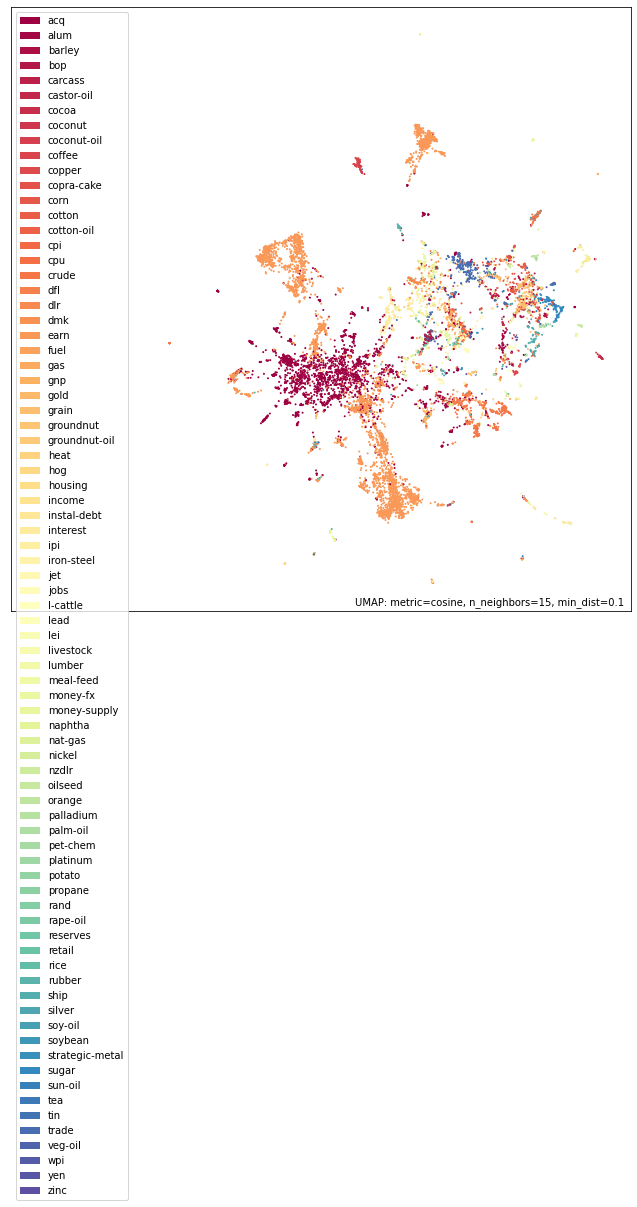

In [16]:
import umap.plot
import numpy as np
fig = umap.plot.points(embedding, labels=np.array(target_labels))


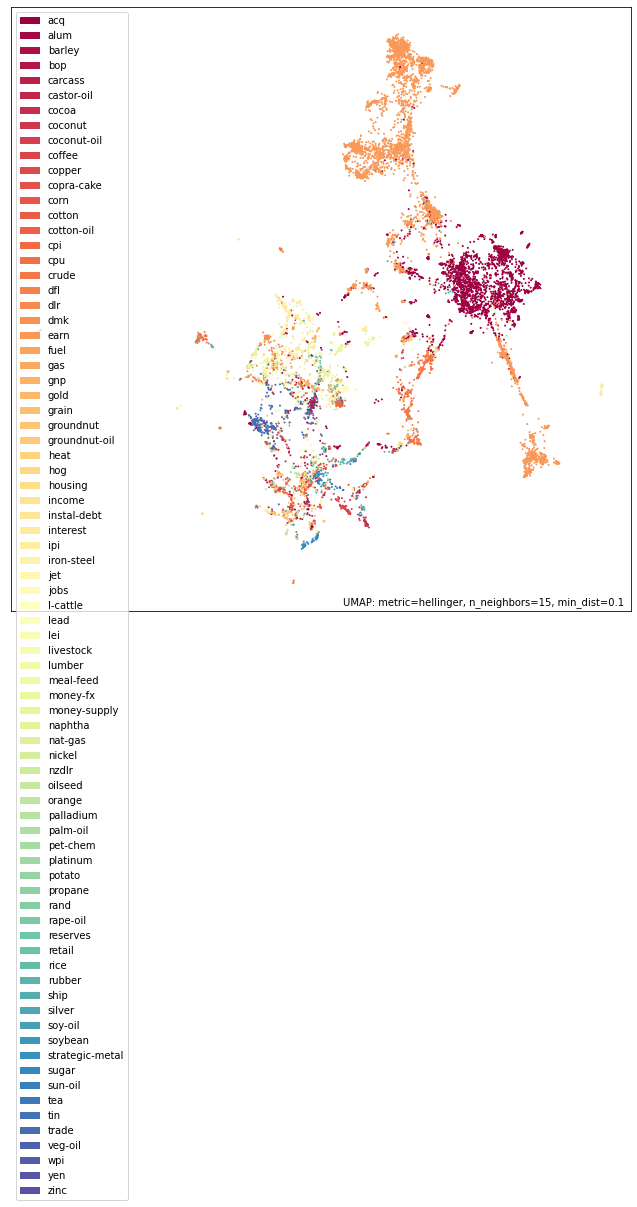

In [18]:
import umap.plot
import numpy as np
fig2 = umap.plot.points(embedding, labels=np.array(target_labels))

In [27]:
import hdbscan, umap

reduced = umap.UMAP(n_components=10, metric='cosine').fit(doc_vecs)

cluster = hdbscan.HDBSCAN(min_cluster_size=5,
                          metric='euclidean',
                          cluster_selection_method='eom').fit(reduced.embedding_)

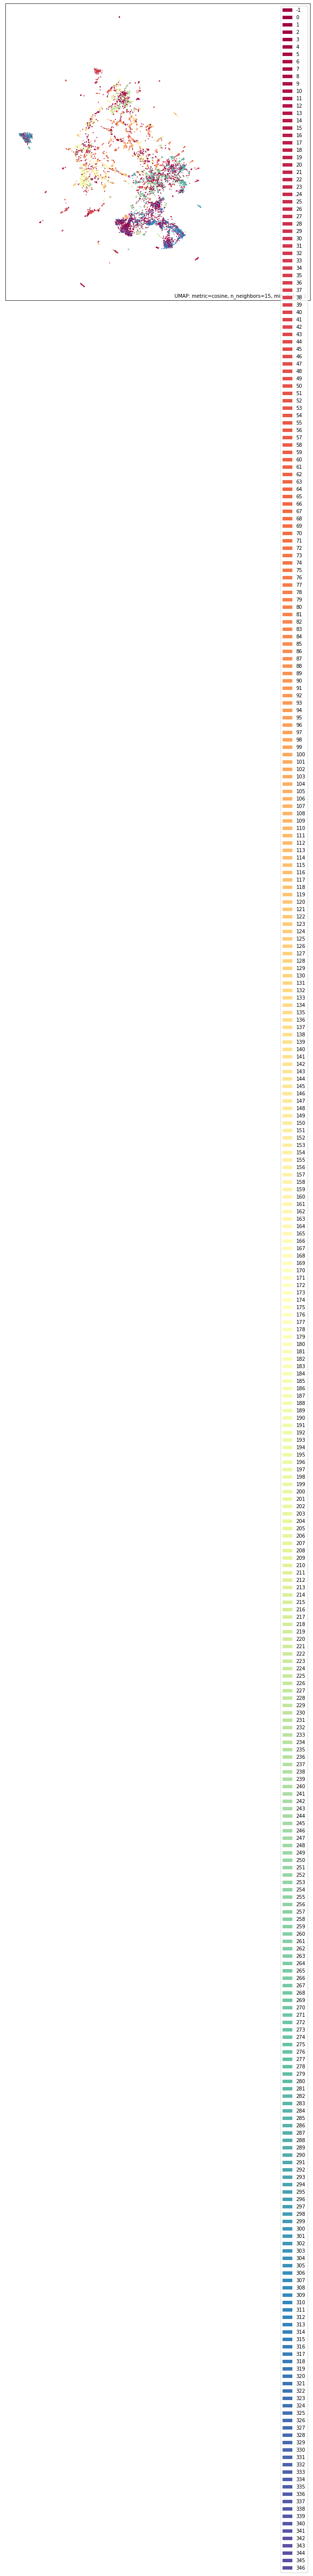

In [28]:
import umap.plot
fig3 = umap.plot.points(embedding, labels=cluster.labels_)